# 目标
+ For this week, you will be using parameters from a neural network
that we have already trained. 
+ Your goal is to implement the feedforward
propagation algorithm to use our weights for prediction. 

## 神经网络结构
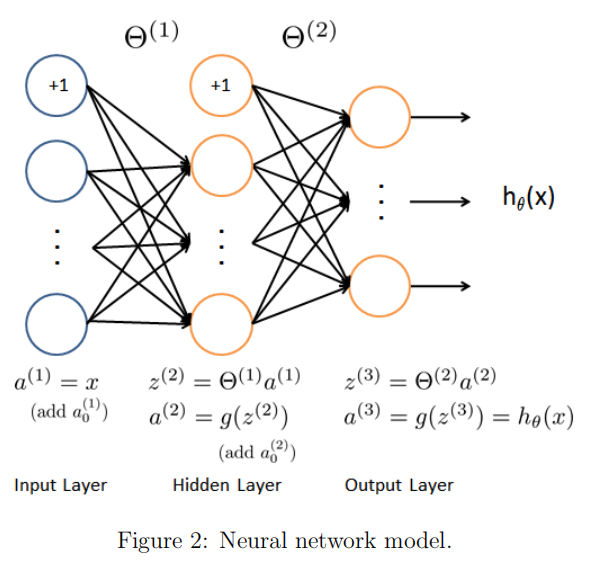

+ Since the images are of size 20×20, this gives us 400 input layer
units (excluding the extra bias unit which always outputs +1)
+ You have been provided with a set of network parameters (Θ(1)
, Θ(2))already trained by us. These are stored in `ex3weights.mat` . The parameters have dimensionsthat are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

## 导入包

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as io

base = "/content/drive/MyDrive/Colab Notebooks/AndrewNg-Machine-Learning-Homework/ex3-Nerual-Networks"

## 导入数据与提前训练好的参数

In [6]:
data_path = base + "/ex3data1.mat"
weights_path = base + "/ex3weights.mat"
data = io.loadmat(data_path)
weights = io.loadmat(weights_path)
print(data, weights)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)} {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011', '__version__': '1.0', '__globals__': [], 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
        -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
       [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
        -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
       [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
        -1.20951657e-04, -2.33669661e-06, -7.50

## 切割数据

In [12]:
X = data["X"]
y = data["y"]
Theta1 = weights["Theta1"]
Theta2 = weights["Theta2"]
print("X：", X.shape)
print("y：", y.shape)
print("Theta1：", Theta1.shape)
print("Theta2：", Theta2.shape)

X： (5000, 400)
y： (5000, 1)
Theta1： (25, 401)
Theta2： (10, 26)


## Sigmoid函数

In [14]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## 线性函数

In [15]:
def linearfunction(X, theta):
  return theta @ X

## 前向传播并预测（Feedforward Propagation and Prediction）
m个样本的实现：m=5000

输入层：$A^{(1)}=X\ \ \ \ (add\ bias\ +1)$，其中$A^{(1)}\rightarrow (401, 5000)$

隐层1：$Z^{(2)}=\Theta^{(1)}A^{(1)},A^{(2)}=g(Z^{(2)})\ \ \ \ (add\ bias\ +1)$，其中$A^{(2)}\rightarrow (26, 5000)$

输出层：$Z^{(3)}=\Theta^{(2)}A^{(2)},A^{(3)}=g(Z^{(3)})$，其中$A^{(3)}\rightarrow (10, 5000)$

In [25]:
def FeedforwardPropa(X, Theta1, Theta2):
  # 输入层
  A1 = (np.insert(X, 0, values=1, axis=1)).T # 401*5000
  # 隐层1
  Z2 = linearfunction(A1, Theta1) # 25*5000
  A2 = sigmoid(Z2) # 25*5000
  A2 = np.insert(A2, 0, values=1, axis=0) # 26*5000
  # 输出层
  Z3 = linearfunction(A2, Theta2) # 10*5000
  A3 = sigmoid(Z3) # 25*5000
  return A3

In [18]:
y_hat = FeedforwardPropa(X, Theta1, Theta2)
y_hat.shape

(10, 5000)

## 将预测概率转化为分类结果

In [24]:
def TranslateResult(y_hat):
  y_trans = np.copy(y_hat)
  print(y_trans.shape)
  for i in range(y_hat.shape[1]):
    mmax = 0
    for j in range(y_hat.shape[0]):
      if y_hat[mmax][i] < y_hat[j][i]:
        y_trans[mmax][i] = 0
        mmax = j
      else:
        y_trans[j][i] = 0
    # 如果不进行处理，则会发生对应错误，
    if mmax == 9:
        y_trans[0][i] = 1
    else:
        y_trans[mmax + 1][i] = 1
    y_trans[mmax][i] = 0
  return y_trans

In [26]:
y_trans = TranslateResult(y_hat)
y_trans

(10, 5000)


array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

## 计算Accuracy
$$
Accuracy=\frac{Prediction\ Right}{Total}
$$

In [48]:
def ComputeAccuracy(X, y, y_trans):
  m = X.shape[0]
  right = 0
  for i in range(y_trans.shape[1]):
    label = 0
    for j in range(y_trans.shape[0]):
      if y_trans[j][i] == 1:
        label = j
        if label == 0:
          label = 10
        break
    right += 1 if y[i] == label else 0

    # if y[i] == label:
    #   right += 1
    # else:
    #   print(i)
  accuracy = right / m
  return accuracy

In [50]:
accuracy = ComputeAccuracy(X, y, y_trans)
print("Accuracy：", accuracy)

Accuracy： 0.9752
